# Market Basket Analysis

Market Basket Analysis is a data-driven technique used in retail and e-commerce to uncover patterns of co-occurring items in transactions. It aims to identify relationships between products that are frequently purchased together, providing valuable insights for product placement, cross-selling, and marketing strategies.

The dataset provided contains transactional data, with columns representing:

BillNo: A unique identifier for each customer’s bill.
    
Itemname: The name of the purchased item.
    
Quantity: The quantity of the item purchased.
    
Price: The price of each item.
    
CustomerID: A unique identifier for each customer.
    
Perform a Market Basket Analysis on the given dataset to discover associations between purchased items. Specifically, the goal is to identify:



In [9]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import plotly.graph_objects as go
pio.templates.default = "plotly_white"


In [10]:
mb=pd.read_csv(r'C:\Users\femif\Downloads\market_basket_dataset.csv')
mb

,BillNo,Itemname,Quantity,Price,CustomerID
0,1000,Apples,5,8.30,52299
1,1000,Butter,4,6.06,11752
2,1000,Eggs,4,2.66,16415
3,1000,Potatoes,4,8.10,22889
4,1004,Oranges,2,7.26,52255
...,...,...,...,...,...
495,1493,Juice,2,4.24,55321
496,1493,Bread,5,7.05,14479
497,1497,Coffee,3,2.01,25378
498,1497,Pasta,3,2.64,53334


In [11]:
#Dispaly first few rows of the data
mb.head()

,BillNo,Itemname,Quantity,Price,CustomerID
0,1000,Apples,5,8.30,52299
1,1000,Butter,4,6.06,11752
2,1000,Eggs,4,2.66,16415
3,1000,Potatoes,4,8.10,22889
4,1004,Oranges,2,7.26,52255


In [12]:
#information about the data
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      500 non-null    int64  
 1   Itemname    500 non-null    object 
 2   Quantity    500 non-null    int64  
 3   Price       500 non-null    float64
 4   CustomerID  500 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 19.7+ KB


In [13]:
#check for null values
mb.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Price         0
CustomerID    0
dtype: int64

In [14]:
#Display the row s and columns of the data\
mb.shape

(500, 5)

In [15]:
mb.describe()

,BillNo,Quantity,Price,CustomerID
count,500.000000,500.000000,500.000000,500.000000
mean,1247.442000,2.978000,5.617660,54229.800000
std,144.483097,1.426038,2.572919,25672.122585
min,1000.000000,1.000000,1.040000,10504.000000
25%,1120.000000,2.000000,3.570000,32823.500000
50%,1246.500000,3.000000,5.430000,53506.500000
75%,1370.000000,4.000000,7.920000,76644.250000
max,1497.000000,5.000000,9.940000,99162.000000


### sales distribution of items

In [20]:
mb['Itemname'].unique()

array(['Apples', 'Butter', 'Eggs', 'Potatoes', 'Oranges', 'Milk',
       'Onions', 'Cereal', 'Tomatoes', 'Bananas', 'Pasta', 'Bread',
       'Coffee', 'Sugar', 'Chicken', 'Cheese', 'Tea', 'Yogurt', 'Juice'],
      dtype=object)

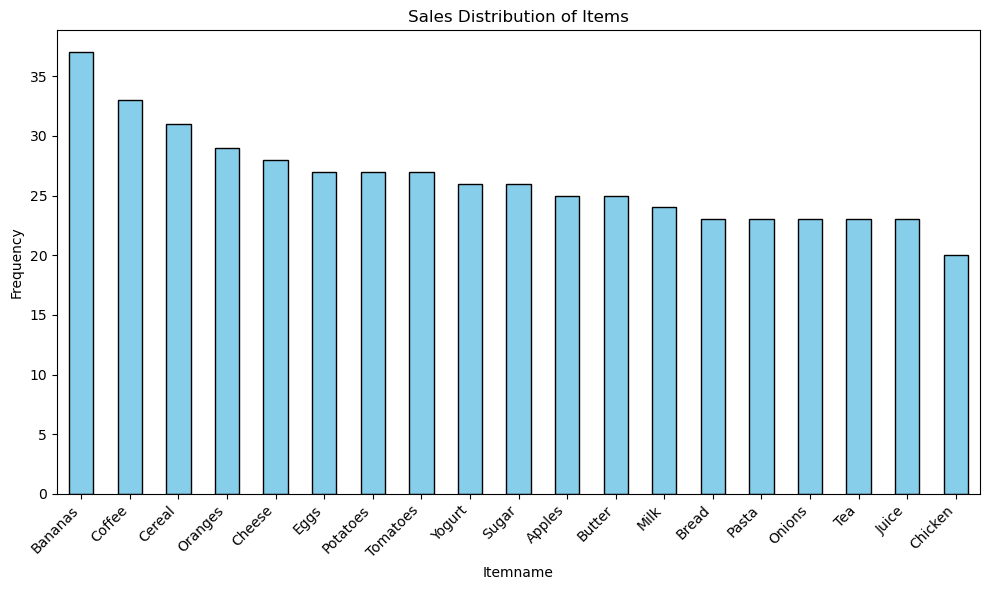

In [21]:

# Count the frequency of each item
item_counts = mb['Itemname'].value_counts()

# Plot the sales distribution of items
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Itemname')
plt.ylabel('Frequency')
plt.title('Sales Distribution of Items')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### top 10 most popular items sold by the store

In [29]:
item_popularity = mb.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)

top_n = 10
fig = go.Figure()

fig.add_trace(go.Bar(
    x=item_popularity.index[:top_n],
    y=item_popularity.values[:top_n],
    text=item_popularity.values[:top_n],
    textposition='auto',
    marker=dict(color='skyblue')
))

fig.update_layout(
    title=f'Top {top_n} Most Popular Items',
    xaxis_title='Item Name',
    yaxis_title='Total Quantity Sold'
)

fig.show()

In [34]:
max_price_item = mb.loc[mb['Price'].idxmax()]


max_price_item

BillNo           1024
Itemname      Bananas
Quantity            2
Price            9.94
CustomerID      33260
Name: 26, dtype: object

In [35]:
min_price_item = mb.loc[mb['Price'].idxmin()]


min_price_item

BillNo          1082
Itemname      Butter
Quantity           4
Price           1.04
CustomerID     53527
Name: 85, dtype: object

Banana is maximum price item and butter is lowest price item

### bananas are the most popular items sold at the store. Now, let’s have a look at the customer behaviour

In [41]:
# Calculate average quantity and spending per customer
customer_behavior = mb.groupby('CustomerID').agg({'Quantity': 'mean', 'Price': 'sum'}).reset_index()

# Create a DataFrame to display the values
table_data = pd.DataFrame({
    'CustomerID': customer_behavior['CustomerID'],
    'Average Quantity': customer_behavior['Quantity'],
    'Total Spending': customer_behavior['Price']
})

# Create a subplot with a scatter plot and a table
fig = go.Figure()

# Add a scatter plot
fig.add_trace(go.Scatter(x=customer_behavior['Quantity'], y=customer_behavior['Price'],
                         mode='markers', text=customer_behavior['CustomerID'],
                         marker=dict(size=10, color='coral')))

# Add a table
fig.add_trace(go.Table(
    header=dict(values=['CustomerID', 'Average Quantity', 'Total Spending']),
    cells=dict(values=[table_data['CustomerID'], table_data['Average Quantity'], table_data['Total Spending']]),
))

# Update layout
fig.update_layout(title='Customer Behavior',
                  xaxis_title='Average Quantity', yaxis_title='Total Spending')

# Show the plot
fig.show()

Through an analysis ,we understood which item people purchased the most